In [4]:

import pandas as pd
import csv
import numpy as np
import mplcursors
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [5]:
def find_repo_root(start_path):
    """
    useful general function for finding the (first, closest) repo root so github file paths work the same on different machines 
    """
    current_path = os.path.abspath(start_path)
    
    while True:
        # Check for the existence of the .git directory or other indicators
        if os.path.isdir(os.path.join(current_path, '.git')) or \
           os.path.isfile(os.path.join(current_path, 'README.md')):
            return current_path
        
        parent_path = os.path.dirname(current_path)
        
        # Stop if we reach the root directory
        if parent_path == current_path:
            break
        
        current_path = parent_path

    return None  # Return None if not found

root = find_repo_root(os.getcwd())

In [6]:
### Make matrix with all movie
all_tropes = []
matrix_maker = []
genres = []
with open(f"{root}/Data/liteweight/2020_genre_counts_by_trope.csv", "r") as file:

    reader = csv.reader(file)
    row1 = next(reader)
    for i in range(2,29):
            genres.append(row1[i])
    for line in reader:
        #line_list = line.split(",")
        all_tropes.append(line[1])
        genre_counts = []
        for i in range(2,29):
            genre_counts.append(int(line[i]))
        normalization = sum(genre_counts)
        try:
            genre_percents = [genre_count / normalization for genre_count in genre_counts]
            matrix_maker.append(genre_percents)
        except ZeroDivisionError:
            matrix_maker.append(genre_counts)
    
bad_matrix = np.array(matrix_maker)
matrix = bad_matrix.transpose()
print(len(all_tropes))

26246


In [7]:
### Define step function
def H(x,t):
    if x < t:
        return 0
    elif x >= t:
        return 1

In [ ]:
### Fill in movie vector
tau = 1 ### This is the lifetime of the trope


### Define step function
def H(x,t):
    if x < t:
        return 0
    elif x >= t:
        return 1
    
    
def vec_filler(x):
    movie_vec = [0] * len(all_tropes)
    with open(f"{root}/Code/Alien Stuff/Alien Tropes - CodeTest.tsv", "r") as file:
        tsv_reader = csv.reader(file, delimiter='\t')
        next(tsv_reader)
        for line in tsv_reader:
            trope = line[0].replace(" ", "")
            if trope in all_tropes:
                vec_index = all_tropes.index(trope)
                if line[1] == "Yes" or line[2] == "Yes" and line[5] != "Yes":
                    movie_vec[vec_index] -= H((tau + float(line[6])) , x) * H(x, float(line[6]))
                elif line[5] == "Yes":
                    pass
                else:
                    movie_vec[vec_index] += H((tau + float(line[6])) , x) * H(x, float(line[6]))
            elif trope not in all_tropes:
                pass ### Need to find a way to keep track of this
    normalizer = sum(movie_vec)
    try:
        movie_vec = [element / normalizer for element in movie_vec]
        movie_vec = np.array(movie_vec)
        return movie_vec
    except ZeroDivisionError:
        return movie_vec

    



In [9]:
x = 0
snapshots = []
x_points = []
while x <= 7014:
    new_basis_vec = np.matmul(matrix, vec_filler(x))
    new_basis_vec = list(new_basis_vec)
    snapshots.append(new_basis_vec)
    x_points.append(x)
    x += 1
    print(x)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

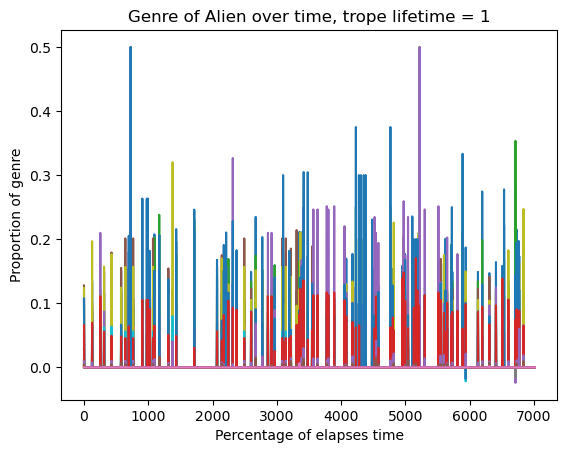

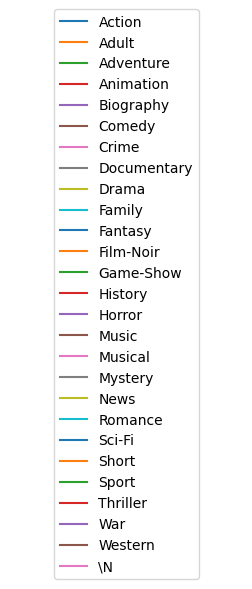

In [10]:
### All genres
genre_proportions = np.transpose(snapshots)
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(0, len(genres)):
    ax.plot(x_points, genre_proportions[i], label = genres[i])
plt.xlabel("Percentage of elapses time")
plt.ylabel("Proportion of genre")
plt.title("Genre of Alien over time, trope lifetime = " + str(tau))

# then create a new image
# adjust the figure size as necessary
figsize = (3, 3)
fig_leg = plt.figure(figsize=figsize)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center')
# hide the axes frame and the x/y labels
ax_leg.axis('off')


In [11]:
averages = []
top_genres = []
top_genre_props = []
for row in genre_proportions:
    averages.append(np.mean(row))
ranked = averages.copy()
ranked.sort()
for i in range(0,6):
    maximum = np.max(ranked)
    ranked.remove(maximum)
    index = averages.index(maximum)
    top_genres.append(genres[index])
    top_genre_props.append(genre_proportions[index])

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

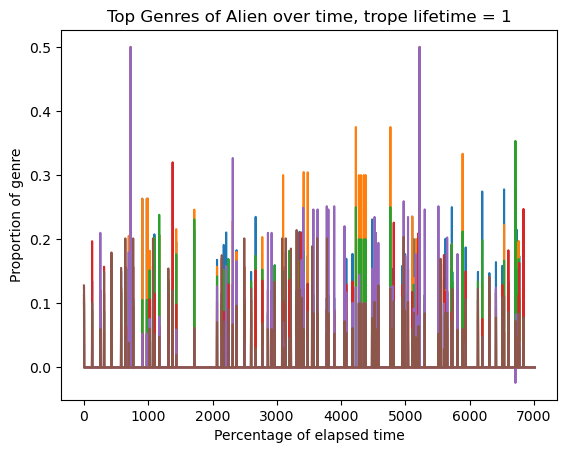

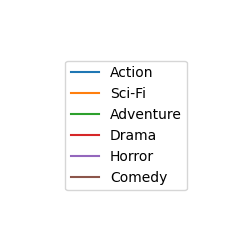

In [12]:
### Top 6
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(0, len(top_genres)):
    ax.plot(x_points, top_genre_props[i], label = top_genres[i])
plt.xlabel("Percentage of elapsed time")
plt.ylabel("Proportion of genre")
plt.title("Top Genres of Alien over time, trope lifetime = " + str(tau))

# then create a new image
# adjust the figure size as necessary
figsize = (3, 3)
fig_leg = plt.figure(figsize=figsize)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center')
# hide the axes frame and the x/y labels
ax_leg.axis('off')

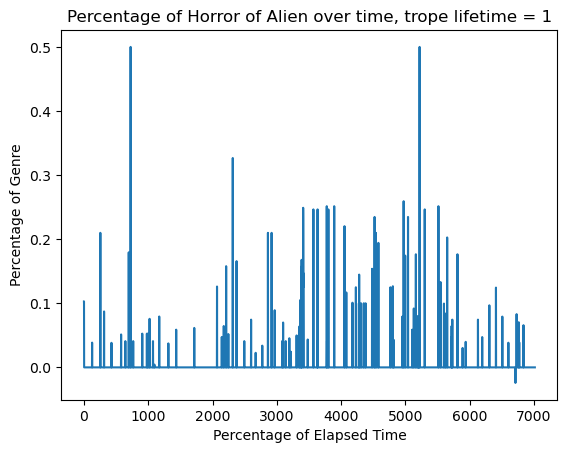

In [13]:
### Dealers Choice
genre = "Horror"  ### Input genre here

_index = genres.index(genre)
props = list(genre_proportions[_index])
plt.plot(x_points, props)
plt.xlabel("Percentage of Elapsed Time")
plt.ylabel("Percentage of Genre")
plt.title("Percentage of " + genre + " of Alien over time, trope lifetime = " + str(tau))
plt.show()

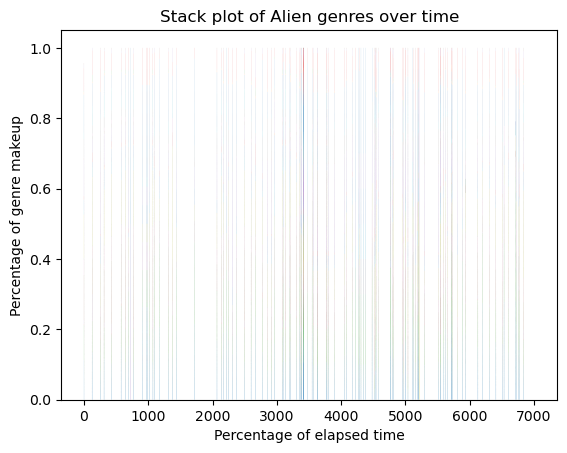

RuntimeError: Can not put single artist in more than one figure

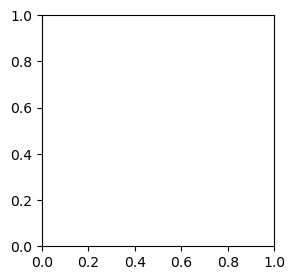

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# prop_list = []
# for i in range(0, len(genre_proportions)):
#     prop_list.append(list(genre_proportions[i]))
# ax.stackplot(x_points, prop_list, labels = genres)
# plt.xlabel("Percentage of elapsed time")
# plt.ylabel("Percentage of genre makeup")
# plt.title("Stack plot of Alien genres over time")
# plt.show()

# # then create a new image
# # adjust the figure size as necessary
# figsize = (3, 3)
# fig_leg = plt.figure(figsize=figsize)
# ax_leg = fig_leg.add_subplot(111)
# # add the legend from the previous axes
# ax_leg.legend(*ax.get_legend_handles_labels(), loc='center')
# # hide the axes frame and the x/y labels
# ax_leg.axis('off')

In [ ]:
### Get titles, times, and descriptions of tropes

labels = []
times = []
with open(f"{root}/Code/Alien Stuff/Alien Tropes - CodeTest.tsv", "r") as file:
    tsv_reader = csv.reader(file, delimiter='\t')
    next(tsv_reader)
    for line in tsv_reader:
        trope = line[0].replace(" ", "")
        inverted_or_defied = line[1]
        averted_or_subverted = line[2]
        descriptor = line[3]
        background = line[4]
        setup = line[5]
        start_time = float(line[6])
        end_time = float(line[7])
        if background == "Yes":
            continue
        elif inverted_or_defied == "Yes":
            label = "Inverted/Defied " + trope + ": " + descriptor
            labels.append(label)
            times.append(start_time)
        elif averted_or_subverted == "Yes":
            label = "Averted/Subverted " + trope + ": " + descriptor
            labels.append(label)
            times.append(start_time)
        elif setup == "Yes":
            label_one = "Setup - " + trope + ": " + descriptor
            label_two = "Conclusion - " + trope + ": " + descriptor
            labels.append(label_one)
            times.append(start_time)
            labels.append(label_two)
            times.append(end_time)
        else:
            label = trope + ": " + descriptor
            labels.append(label)
            times.append(start_time)


In [ ]:
times = list(set(times))
labels = [""] * len(times) 
with open(f"{root}/Code/Alien Stuff/Alien Tropes - CodeTest.tsv", "r") as file:
    tsv_reader = csv.reader(file, delimiter='\t')
    next(tsv_reader)
    for line in tsv_reader:
        trope = line[0].replace(" ", "")
        inverted_or_defied = line[1]
        averted_or_subverted = line[2]
        descriptor = line[3]
        background = line[4]
        setup = line[5]
        start_time = float(line[6])
        end_time = float(line[7]) 
        if background == "Yes":
            continue
        elif inverted_or_defied == "Yes":
            label = "Inverted/Defied " + trope + ": " + descriptor
            index = times.index(start_time )
            labels[index] += label + "\n"
        elif averted_or_subverted == "Yes":
            label = "Averted/Subverted " + trope + ": " + descriptor
            index = times.index(start_time)
            labels[index] += label + "\n"
        elif setup == "Yes":
            label_one = "Setup - " + trope + ": " + descriptor
            label_two = "Conclusion - " + trope + ": " + descriptor
            index_one = times.index(start_time)
            labels[index_one] += label_one + "\n"
            index_two = times.index(end_time)
            labels[index_two] += label_two + "\n"
        else:
            label = trope + ": " + descriptor
            index = times.index(start_time)
            labels[index] += label + "\n"

In [ ]:
interactable_y = []
for time in times:
    indecks = x_points.index(time)
    interactable_y.append(props[indecks])

In [ ]:
### Interactable bit

import plotly.graph_objects as go

# Create the plot
fig = go.Figure()

# Add the line plot
fig.add_trace(go.Scatter(
    x=x_points,
    y=props,
    mode='lines',
    name=f'{genre} Makeup Over Time',
    line=dict(color='blue')
))

# Add the scatter points with hover text
fig.add_trace(go.Scatter(
    x=times,
    y=interactable_y,
    mode='markers',
    name='Trope Points',
    marker=dict(color='darkorange', size=8),
    text=labels,  # Hover text for each point
    hoverinfo='text'  # Display the hover text
))

# Update the layout
fig.update_layout(
    title=f"{genre} make up of Alien, with tropes, lifetime = " + str(tau),
    xaxis_title="Elapsed Time(s)",
    yaxis_title="% Makeup",
    showlegend=True,
    template='plotly_white'
)

# Show the plot
fig.show()
